DNA_construct = ptet_UTR1_GFP_t16
these things are bound to MultiPart(SimplePart(ptet-f),SimplePart(protein_tetr-f)): None
DNA_construct = t16_r_RFP_r_UTR1_r_ptet_r
these things are bound to MultiPart(SimplePart(ptet-f),SimplePart(protein_tetr-f)): None
Protein: RNAP
Protein: Ribo
Protein: RNAase
ptet_0
RNA_construct = UTR1_GFP_t16
ptet_3_r
RNA_construct = UTR1_RFP_t16
UTR1_0
GFP_1
UTR1_0
RFP_1
interim dict
{part_ptet: MultiPart(SimplePart(ptet-f),SimplePart(protein_tetr-f)), part_UTR1: SimplePart(UTR1-f), part_GFP: SimplePart(GFP-f), part_t16: SimplePart(t16-f), part_RFP: SimplePart(RFP-f)}
currently found part_ptet
these things are bound to MultiPart(SimplePart(ptet-f),SimplePart(protein_tetr-f)): None
currently found part_UTR1
currently found part_GFP
currently found part_t16
{'type': 'Promoter', 'name': 'ptet', 'fwd': True, 'opts': {'color': (0.9882352941176471, 0.803921568627451, 0.8980392156862745), 'color2': None, 'label': 'ptet', 'label_size': 13, 'label_y_offset': -8}}
{'type'

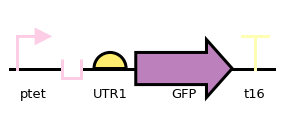

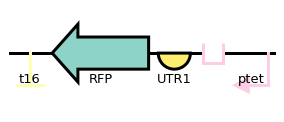

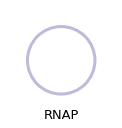

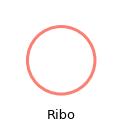

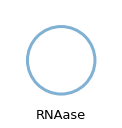

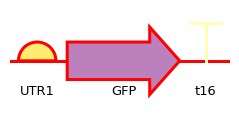

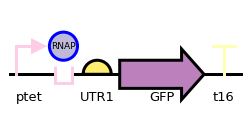

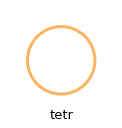

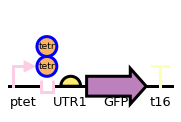

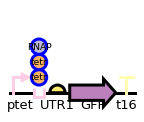

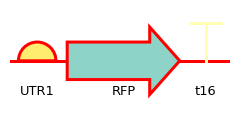

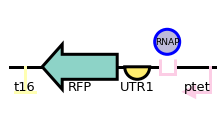

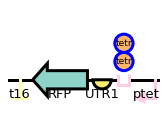

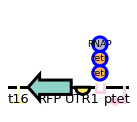

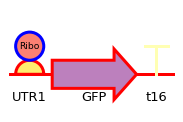

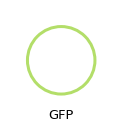

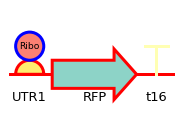

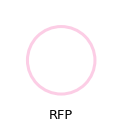

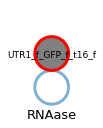

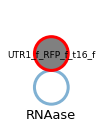

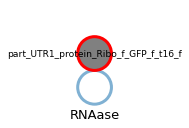

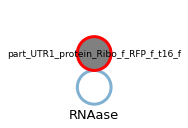

In [1]:
from biocrnpyler import *
import dnaplotlib as dpl
%matplotlib inline

ptet = RegulatedPromoter("ptet",["tetr"],leak=True) #this is a repressible promoter
pconst = Promoter("pconst") #constitutive promoter
pcomb = CombinatorialPromoter("pcomb",["arac","laci"], leak=False,
                              tx_capable_list = [["arac"], ["laci"]]) #the Combinations A and B or just A or just B be transcribed
utr1 = RBS("UTR1") #regular RBS
utr2 = RBS("UTR1") #regular RBS
gfp = CDS("GFP") #a CDS has a name and a protein name. so this one is called GFP and the protein is also called GFP
fusrfp = CDS("fusRFP","RFP",no_stop_codons=["forward"]) #you can say that a protein has no stop codon. This is a little different from a fusion protein, because in this case you are saying that the ribosome reads through two proteins but still produces two distinct proteins, rather than one fused protein. This can happen in the case of the ta peptide which causes a peptide bond not to be formed while making a protein.
rfp = CDS("RFP") #regular RFP
cfp = CDS("CFP") #cfp
t16 = Terminator("t16") #a terminator stops transcription


#now that the parts are defined, we can put together our construct.
construct_1 = DNA_construct([[ptet,"forward"],[utr1,"forward"],[gfp,"forward"],[t16,"forward"]])
construct_2 = DNA_construct([[t16,"reverse"],[rfp,"reverse"],[utr1,"reverse"],[ptet,"reverse"]])

#now, we are using dnaplotlib to plot the constructs




#plotConstruct(construct_1,debug=False,plot_rnas=True)
#plotConstruct(construct_2,debug=False,plot_rnas=True)
plt.show()
#some very basic parameters are defined
parameters={"cooperativity":2,"kb":100, "ku":10, "ktx":.05, "ktl":.2, "kdeg":2,"kint":.05}

components = [construct_1,construct_2]
myMixture = TxTlExtract(name = "txtl", parameters = parameters, components = components)

c1 = myMixture.components[0]
c2 = myMixture.components[1]

dna_render = dpl.DNARenderer(scale = 5,linewidth=3)
rna_render = dpl.DNARenderer(scale = 5,linewidth=3,linecolor=(1,0,0))

mycrn = myMixture.compile_crn()
myplotter = CRNPlotter(dna_renderer=dna_render)

for component in myMixture.component_enumeration(10):
    print(component)
    if(isinstance(component,Construct)):
        a = myplotter.make_dpls_from_construct(component)
        #if(a.material_type=='rna'):
        #    a.renderDNA(rna_render)
        #else:
        #    a.renderDNA(dna_render)

print("interim dict")
print(myplotter.species_dpl_dict)
print("=========")
for species in mycrn.species:
    a = myplotter.make_dpl_from_species(species)
    if(a.material_type is not None):
        plot_bb = True
        if(not isinstance(a,myplotter.SimpleConstruct)):
            plot_bb = False
            newcon = myplotter.SimpleConstruct(a.name,[a],material_type=a.material_type)
        else:
            newcon = a
        if(newcon.material_type=='rna'):
            newcon.renderDNA(rna_render,plot_backbone=plot_bb)
        else:
            newcon.renderDNA(dna_render,plot_backbone=plot_bb)
            

